<a href="https://colab.research.google.com/github/Ronphrey/TDI/blob/main/TDI_week_10_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parsed_job_data.csv',delimiter = ';')

In [50]:
df.head(5)

,Job_title,Company_name,Location,min_num_emp,sector,year_founded,avg_salary($),min_max_salary,rating,cleaned_Job_description
1004,Tech Staff - Artificial Intelligence and Machi...,MIT Lincoln Laboratory,"Lexington, MA",1001,Aerospace & Defense,1951,12550.0,105000-146000,4,"[advanced, concept, technology, group, looking..."
1021,Software Engineer - Artificial Intelligence & ...,Peraton,"Fort Belvoir, VA",10000,Information Technology,2017,14550.0,112000-179000,4,"[responsibility, distinguished, heritage, trac..."
1026,Artificial Intelligence & Machine Learning Res...,Aurora Flight Sciences,"Cambridge, MA",501,Aerospace & Defense,1989,10450.0,86000-123000,4,"[artificial, intelligence, machine, learning, ..."
1040,"Senior Software Engineer, Machine Learning and...",Mashgin,"Palo Alto, CA",51,Information Technology,2013,NaN,None,4,"[mashgin, mashgin, developing, future, checkou..."
1044,Conversational AI Data Scientist Engineer,Live Nation,Remote,10000,Media & Communication,2005,NaN,None,4,"[job, summary, job, description, conversationa..."


In [30]:
# The minimum number of employees for each listed company using information from the company_overview column.
df['min_num_emp']=df['Company_Overview'].str.findall(r'\d+').str[0]
df['min_num_emp']

,min_num_emp
0,51
1,1001
2,201
3,51
4,1001
...,...
3761,1001
3762,1001
3763,10000
3764,501


In [31]:
# Identify the sector or industry focus for each tech company based on the details in the company_overview column
pattern = r'\nSector\n(?P<sector>[^\n]+)\n'
df['sector']= df['Company_Overview'].str.extract(pattern)
df['sector']

,sector
0,Information Technology
1,Retail & Wholesale
2,Manufacturing
3,Information Technology
4,Manufacturing
...,...
3761,Information Technology
3762,Financial Services
3763,Healthcare
3764,Insurance


In [32]:
# Extract the year each company was founded from the company_overview column and list the results.
pattern = r'\b(19[0-9]{2}|20[0-2][0-9])\b'
df['year_founded'] =df['Company_Overview'].str.extract(pattern)
df['year_founded']

,year_founded
0,NaN
1,1999
2,NaN
3,2016
4,1925
...,...
3761,2002
3762,1983
3763,1945
3764,1987


In [33]:
# Calculate the average salary for the AI jobs listed using the salary_fork column.
word1 = 'AI'
word2 = 'Artificial'
contains_word1 = df['Job_title'].str.contains(word1, case=False, regex=False)
contains_word2 = df['Job_title'].str.contains(word2, case=False, regex=False)

df = df[(contains_word1 | contains_word2) & ~(contains_word1 & contains_word2)]

def extract_salary(salary):
  salary = salary.replace('K','00').replace('.00',' ')
  match = re.findall(r"(\d+)", salary)
  for x in salary:
    if len(match) == 2:
          min_salary, max_salary = int(match[0]), int(match[1])
          return (min_salary + max_salary) / 2
    return None

df['avg_salary($)'] = df['Salary_fork'].apply(extract_salary)

<ipython-input-33-8b8235d39496>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary($)'] = df['Salary_fork'].apply(extract_salary)


In [34]:
# Determine the salary range (minimum and maximum salaries) from the salary_fork column.
def extract_salary(salary):
    salary = salary.replace('K', '000').replace("'", "").replace(",", "")
    matches = re.findall(r"(\d+)", salary)
    if len(matches) == 2:
        min_salary, max_salary = int(matches[0]), int(matches[1])
        return f"{min_salary}-{max_salary}"
    return None

df['min_max_salary'] = df['Salary_fork'].apply(extract_salary)
df["min_max_salary"]

<ipython-input-34-4102e48c41c0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_max_salary'] = df['Salary_fork'].apply(extract_salary)


,min_max_salary
1004,105000-146000
1021,112000-179000
1026,86000-123000
1040,None
1041,None
...,...
3538,None
3545,107000-199000
3618,86000-125000
3697,70000-109000


In [35]:
df.head(2)

,Job_title,Company_name,Location,Salary_fork,Rating,Company_Overview,Job_description,Avg_base_salary,min_num_emp,sector,year_founded,avg_salary($),min_max_salary
1004,Tech Staff - Artificial Intelligence and Machi...,MIT Lincoln Laboratory,"Lexington, MA",$105K - $146K (Glassdoor est.),4.3,Company Overview\nSize\n1001 to 5000 Employees...,The Advanced Concepts & Technologies Group is ...,"Average Base Salary Estimate\n$123,680 /yr (es...",1001,Aerospace & Defense,1951,12550.0,105000-146000
1021,Software Engineer - Artificial Intelligence & ...,Peraton,"Fort Belvoir, VA",Employer Provided Salary:$112K - $179K,3.7,Company Overview\nSize\n10000+ Employees\nFoun...,Responsibilities:\nWith a distinguished herita...,Average Base Salary Estimate\nEstimate provide...,10000,Information Technology,2017,14550.0,112000-179000


In [36]:
# Convert the floating-point values in the rating column into whole numbers (e.g., round ratings to the nearest integer).
df['Rating']=df['Rating'].str.replace('Rating','4.0').str.replace('-1','4.0')
df['Rating'].dtype

<ipython-input-36-969881e7b3ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating']=df['Rating'].str.replace('Rating','4.0').str.replace('-1','4.0')


dtype('O')

In [37]:
df['rating']=df['Rating'].astype('float')
df['rating'] = df['rating'].apply(lambda x: round(x) if isinstance(x, float) else x)

<ipython-input-37-30301b04a766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating']=df['Rating'].astype('float')
<ipython-input-37-30301b04a766>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].apply(lambda x: round(x) if isinstance(x, float) else x)


In [38]:
df.rename(columns = {'rating': 'Rating'})

,Job_title,Company_name,Location,Salary_fork,Rating,Company_Overview,Job_description,Avg_base_salary,min_num_emp,sector,year_founded,avg_salary($),min_max_salary,Rating
1004,Tech Staff - Artificial Intelligence and Machi...,MIT Lincoln Laboratory,"Lexington, MA",$105K - $146K (Glassdoor est.),4.3,Company Overview\nSize\n1001 to 5000 Employees...,The Advanced Concepts & Technologies Group is ...,"Average Base Salary Estimate\n$123,680 /yr (es...",1001,Aerospace & Defense,1951,12550.0,105000-146000,4
1021,Software Engineer - Artificial Intelligence & ...,Peraton,"Fort Belvoir, VA",Employer Provided Salary:$112K - $179K,3.7,Company Overview\nSize\n10000+ Employees\nFoun...,Responsibilities:\nWith a distinguished herita...,Average Base Salary Estimate\nEstimate provide...,10000,Information Technology,2017,14550.0,112000-179000,4
1026,Artificial Intelligence & Machine Learning Res...,Aurora Flight Sciences,"Cambridge, MA",$86K - $123K (Glassdoor est.),4.1,Company Overview\nSize\n501 to 1000 Employees\...,Artificial Intelligence & Machine Learning Re...,"Average Base Salary Estimate\n$102,804 /yr (es...",501,Aerospace & Defense,1989,10450.0,86000-123000,4
1040,"Senior Software Engineer, Machine Learning and...",Mashgin,"Palo Alto, CA",-1,4.2,Company Overview\nSize\n51 to 200 Employees\nF...,"About Mashgin\nAt Mashgin, we are developing ...",-1,51,Information Technology,2013,NaN,None,4
1041,Artificial intelligence / Machine Learning Eng...,Cotocus,"Sacramento, CA",-1,4.4,Company Overview\nSize\n1 to 50 Employees\nTyp...,Job Description\nWe are looking for engineer w...,-1,1,NaN,NaN,NaN,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,AI Training for Finance Experts,Scaleapi,Remote,Employer Provided Salary:$32.00 - $45.00 Per Hour,3.6,Company Overview\nSize\n51 to 200 Employees\nF...,Are you interested in helping to train AI mode...,Average Base Salary Estimate\nEstimate provide...,51,Information Technology,2016,38.5,None,4
3545,"Staff Analytics Engineer, Data & AI",Warner Bros. Discovery,"New York, NY",Employer Provided Salary:$107K - $199K,3.8,Company Overview\nSize\n10000+ Employees\nFoun...,"Every great story has a new beginning, and you...",Average Base Salary Estimate\nEstimate provide...,10000,Media & Communication,2003,15300.0,107000-199000,4
3618,AI/Machine Learning Data Scientist,SAP,"Chicago, IL",$86K - $125K (Glassdoor est.),4.4,Company Overview\nSize\n10000+ Employees\nFoun...,We help the world run better\nOur company cult...,"Average Base Salary Estimate\n$103,795 /yr (es...",10000,Information Technology,1972,10550.0,86000-125000,4
3697,Junior AI Engineer,Octo,"Reston, VA",$70K - $109K (Glassdoor est.),4.2,Company Overview\nSize\n1001 to 5000 Employees...,You…\nYou are passionate about creative applic...,"Average Base Salary Estimate\n$87,443 /yr (est...",1001,Information Technology,2006,8950.0,70000-109000,4


In [39]:
# Ensure the minimum length of each job description is at least 5% of the maximum job description length within the dataset.
df['Job_description']=df['Job_description'].astype('str')
max_length = df['Job_description'].str.len().max()
min_acceptable_length = int(0.05 * max_length)
df= df[df['Job_description'].str.len() >= min_acceptable_length]

<ipython-input-39-a48a791f454d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_description']=df['Job_description'].astype('str')


In [40]:
df.head(2)

,Job_title,Company_name,Location,Salary_fork,Rating,Company_Overview,Job_description,Avg_base_salary,min_num_emp,sector,year_founded,avg_salary($),min_max_salary,rating
1004,Tech Staff - Artificial Intelligence and Machi...,MIT Lincoln Laboratory,"Lexington, MA",$105K - $146K (Glassdoor est.),4.3,Company Overview\nSize\n1001 to 5000 Employees...,The Advanced Concepts & Technologies Group is ...,"Average Base Salary Estimate\n$123,680 /yr (es...",1001,Aerospace & Defense,1951,12550.0,105000-146000,4
1021,Software Engineer - Artificial Intelligence & ...,Peraton,"Fort Belvoir, VA",Employer Provided Salary:$112K - $179K,3.7,Company Overview\nSize\n10000+ Employees\nFoun...,Responsibilities:\nWith a distinguished herita...,Average Base Salary Estimate\nEstimate provide...,10000,Information Technology,2017,14550.0,112000-179000,4


In [41]:
# Remove all words or characters in the job descriptions that are shorter than 3 characters.
def clean_job_description(text):
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = text.replace('\n', ' ')
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['cleaned_Job_description'] = df['Job_description'].apply(clean_job_description)



In [42]:
df.columns

Index(['Job_title', 'Company_name', 'Location', 'Salary_fork', 'Rating',
       'Company_Overview', 'Job_description', 'Avg_base_salary', 'min_num_emp',
       'sector', 'year_founded', 'avg_salary($)', 'min_max_salary', 'rating',
       'cleaned_Job_description'],
      dtype='object')

In [43]:
cols_to_drop=['Salary_fork','Rating','Company_Overview','Avg_base_salary','Avg_base_salary','Job_description']
df.drop(cols_to_drop, axis = 1,inplace = True)

In [21]:

df = df.rename(columns={'min_num_emp':'employees','year_founded':'founded','min_max_salary':'salary_range($)'})

,Job_title,Company_name,Location,employees,sector,founded,avg_salary($),salary_range($),rating,cleaned_Job_description
1004,Tech Staff - Artificial Intelligence and Machi...,MIT Lincoln Laboratory,"Lexington, MA",1001,Aerospace & Defense,1951,12550.0,105000-146000,4,the advanced concepts technologies group loo...
1021,Software Engineer - Artificial Intelligence & ...,Peraton,"Fort Belvoir, VA",10000,Information Technology,2017,14550.0,112000-179000,4,responsibilities with distinguished heritage ...
1026,Artificial Intelligence & Machine Learning Res...,Aurora Flight Sciences,"Cambridge, MA",501,Aerospace & Defense,1989,10450.0,86000-123000,4,artificial intelligence machine learning rese...
1040,"Senior Software Engineer, Machine Learning and...",Mashgin,"Palo Alto, CA",51,Information Technology,2013,NaN,None,4,about mashgin mashgin are developing the fut...
1044,Conversational AI Data Scientist Engineer,Live Nation,Remote,10000,Media & Communication,2005,NaN,None,4,job summary job description conversational d...
...,...,...,...,...,...,...,...,...,...,...
3538,AI Training for Finance Experts,Scaleapi,Remote,51,Information Technology,2016,38.5,None,4,are you interested helping train models be...
3545,"Staff Analytics Engineer, Data & AI",Warner Bros. Discovery,"New York, NY",10000,Media & Communication,2003,15300.0,107000-199000,4,every great story has new beginning and yours...
3618,AI/Machine Learning Data Scientist,SAP,"Chicago, IL",10000,Information Technology,1972,10550.0,86000-125000,4,help the world run better our company culture ...
3697,Junior AI Engineer,Octo,"Reston, VA",1001,Information Technology,2006,8950.0,70000-109000,4,you you are passionate about creative applicat...


In [44]:
# Create a word cloud from the cleaned job descriptions, ensuring a minimum of 5 tokens and a maximum of 100 tokens are included.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet , stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [45]:
nltk.download('punkt')
df['cleaned_Job_description'] = df['cleaned_Job_description'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df['cleaned_Job_description'] = df['cleaned_Job_description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['cleaned_Job_description'] = df['cleaned_Job_description'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


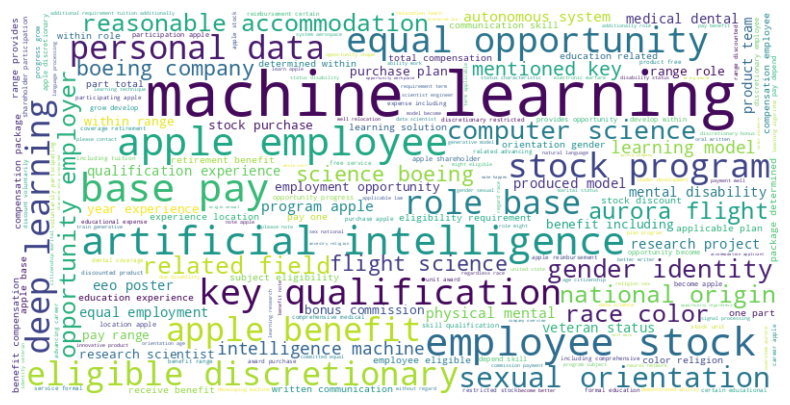

In [48]:
all_words = ' '.join([' '.join(words) for words in df['cleaned_Job_description']])

wordcloud = WordCloud(width = 800,height =400,background_color ='white').generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

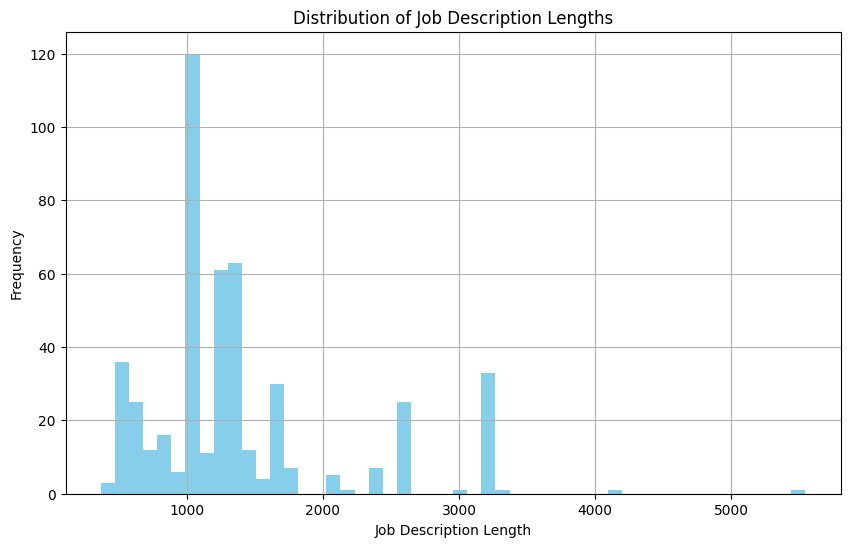

In [49]:
# Visualize the distribution of job descriptions by creating histograms that focus on the length of each job post or description from the cleaned data.
plt.figure(figsize=(10, 6))
plt.hist(df['cleaned_Job_description'].str.len(), bins=50, color='skyblue')
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Job Description Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()